## DATA 690 Homework 4 (100 points - Due on Thursday, March 16, 2023 by 11:59 pm ET)

The output of this assignment for submission should be in PDF format **AND** .py or .ipynb. The name of the file should be as follows: Lastname_Firstname_Homework4.pdf (example: Thomas_Sunela_Homework4.pdf) **AND** Lastname_Firstname_Homework4.ipynb (example: Thomas_Sunela_Assignment4.ipynb. In short, you are submitting the python notebook as well as the pdf of that notebook. Do **NOT** submit .html file, the system will give you an error.

    
Incorrect file name will cost you points!<br>

Instructions for converting a Jupyter Python notebook to PDF: Go to the menu and choose, File --> Download As --> html. Open that html file and print it to PDF. Submit the PDF file **NOT** the html file.

If you are using Google Colab, remember to review the PDF before submitting to ensure that all cells and answers are displayed in the PDF.

**Things to note:**

* Each cell should display an output
* Use both Markdown and code comments in the Jupyter Notebook as needed

### IF YOU ARE MAKING ANY ASSUMPTIONS, WRITE THAT IN A MARKDOWN CELL OR COMMENT
### $\color{red}{\text{Answer the questions asked as well, not just code}}$


In this Homework assignment, you will be using techniques you learned to clean-up and analyze the data. A survey was performed to collect various body measurements and characteristics from a sample of individuals.

Why does the data need to be cleaned? In spite of the clear instructions given, it seems that some of the responses provided can't possibly be right. Many data scientists will tell you that easily more than 50% of your time is spent cleaning, preparing, and validating data. This activity will give you an opportunity to turn the messy survey responses into a useful data set from which you can extract meaningful insights.

The data has been loaded for you in the cell below.

In [1]:
# Import libraries and data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

%matplotlib inline

body_data = pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA-690/main/Assignments%3AHomeworks/HW_4/class_survey_body_measurements.csv')
col_names = ['timestamp', 'sex', 'handspan', 'height', 
             'shoe_size','hair_color', 'mother_height', 'mother_shoe_size',
             'mother_hair_color', 'father_height', 'father_shoe_size',
             'father_hair_color','athlete','shoulder_width','skull_circum']
body_data.columns = col_names
body_data.head()

,timestamp,sex,handspan,height,shoe_size,hair_color,mother_height,mother_shoe_size,mother_hair_color,father_height,father_shoe_size,father_hair_color,athlete,shoulder_width,skull_circum
0,9/20/2018 12:21,Male,7.75,NaN,9.5,Black,63.0,7.0,Brown,69.0,10.5,Black,No,18.00,22.25
1,9/20/2018 18:43,Male,8.50,67.00,8.5,Blonde,62.0,6.0,Brown,74.0,11.0,Blonde,Yes,16.00,24.00
2,9/20/2018 18:53,Female,7.00,62.00,7.0,Black,61.0,6.0,Black,65.0,9.0,Black,Yes,15.00,22.00
3,9/20/2018 20:13,Male,8.00,68.25,9.0,Brown,58.0,NaN,Blonde,70.0,10.0,Black,No,17.25,21.75
4,9/20/2018 20:31,NaN,10.00,71.00,11.0,Black,NaN,9.0,Black,NaN,11.0,Black,No,19.00,22.00


### Problem 1: (3 points)

<span  style="color:purple; font-size:16px">Create a scatterplot of `height` (y-axis) versus `handspan` (x-axis). </span>

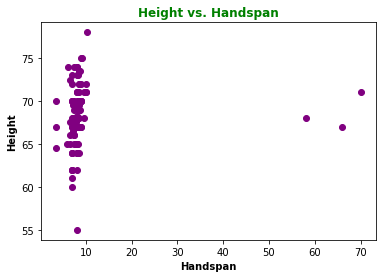

In [2]:
# Answer

# Create a scatterplot of height vs. handspan

plt.scatter(body_data['handspan'], body_data['height'], color='purple') # x-axis is handspan, y-axis is height
plt.xlabel('Handspan', fontweight='bold') # add x-axis label
plt.ylabel('Height', fontweight='bold') # add y-axis label
plt.title('Height vs. Handspan', fontweight='bold', color='green') # add title
plt.show() 

Whoa! That doesn't look right! The people that responded to the survey must have mixed up measurement units!

<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">
    
+ The code creates a scatterplot with **```handspan```** on the x-axis and **```height```**  on the y-axis using **```plt.scatter()```**
    
+ The **```.xlabel()```** **```.ylabel()```** and **```.title()```** functions are used to add labels to the plot
    
+ Finally, the **```.show()```** function is called to display the plot. </span>

### Problem 2: (3 points)

<span  style="color:purple; font-size:16px">Set observations where `handspan` is greater than 30 or less than 4 to be missing using `pd.np.nan`. (Hint: Create a Boolean filter for the observations you want to remove. Extract the index for these observations and then using the `.loc[]` method, set the `handspan` values for these observations to `pd.np.nan`, the Numpy value that represents missing values.</span>

In [3]:
# Answer

# Create a Boolean filter for rows with handspan values outside the range of 4 to 30
filt = (body_data['handspan'] > 30) | (body_data['handspan'] < 4)

# Extract the index for these observations
indices = body_data[filt].index

# Set handspan values for these observations to pd.np.nan
body_data.loc[indices, 'handspan'] = np.nan

#Print the NaN values of the handspan column
body_data[body_data['handspan'].isnull()]

,timestamp,sex,handspan,height,shoe_size,hair_color,mother_height,mother_shoe_size,mother_hair_color,father_height,father_shoe_size,father_hair_color,athlete,shoulder_width,skull_circum
37,9/21/2018 15:59,Male,NaN,68.0,8.0,Brown,NaN,NaN,Blonde,NaN,NaN,Brown,Yes,24.0,10.0
53,9/22/2018 11:04,Male,NaN,71.0,9.0,Blonde,64.0,NaN,Brown,72.0,NaN,Brown,Yes,21.0,21.5
65,9/22/2018 19:57,Male,NaN,67.0,7.0,Black,63.0,7.0,Black,68.0,10.0,Black,Yes,17.0,23.0
76,9/23/2018 16:16,Male,NaN,67.0,8.0,Brown,NaN,NaN,Brown,NaN,NaN,Black,Yes,17.0,22.0
86,9/23/2018 22:30,Male,NaN,70.0,9.0,Black,66.0,6.0,Brown,70.0,10.0,Black,Yes,16.0,15.8
95,9/24/2018 19:04,Female,NaN,64.5,8.5,Brown,63.0,7.0,Black,65.0,8.5,Black,No,26.0,22.0


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ The code first creates a Boolean filter for the rows with handspan values outside of the desired range of 4 and 30 using the <span  style="color:red; font-size:16px"> **|**</span> operator  
    
+ Then it extracts the indices of the rows that satisfy this condition using the **```.index```** attribute 
    
+ And then it uses the **```.loc```** method to set the handspan values for these observations to **```np.nan```** 

</span>

### Problem 3: (3 points)

<span  style="color:purple; font-size:16px">Re-create the scatterplot of `height` (x-axis) versus `handspan` (y-axis) now that you have removed the problem observations. Describe the resulting relationship between an individual's `handspan` and their `height`. Make sure to address the form, strength, and direction of the relationship.</span>

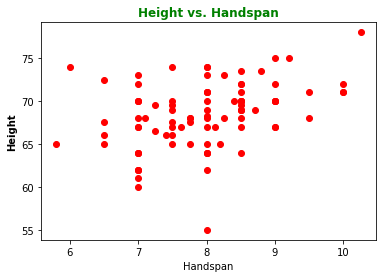

In [4]:
# Answer

# Create a scatterplot of height vs. handspan

plt.scatter(body_data['handspan'], body_data['height'], color='red') # x-axis is handspan, y-axis is height
plt.xlabel('Handspan') # add x-axis label
plt.ylabel('Height', fontweight='bold') # add y-axis label
plt.title('Height vs. Handspan', fontweight='bold', color='green') # add title
plt.show() 

<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

After analysing the plot, I make the following observations:

+ <span  style="color:orange; font-size:14px"> **Direction:**</span> As an individual's handspan increases, their height tends to increase as well

  + Therefore, I think there is a positive direction in the relationship between handspan and height

+ <span  style="color:orange; font-size:14px"> **Form:**</span> I believe that the relationship between handspan and height is roughly linear

+ <span  style="color:orange; font-size:14px"> **Strength:**</span> We can see that taller individuals tend to have larger handspans than shorter individuals

  + I can say that the relationship is moderately strong, which means that there is a noticeable association between handspan and height, but it is not a perfect correlation
    
</span>

### Problem 4: (3 points)

<span  style="color:purple; font-size:16px">Import the Seaborn library and the `regplot()` function to fit a line of best fit through the data to describe the relationship between `handspan` and `height`.</span>

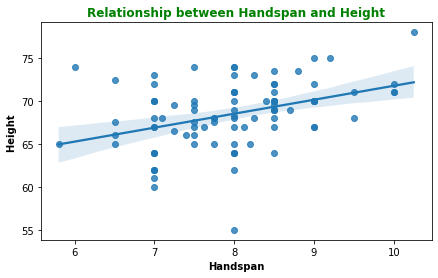

In [5]:
# Answer

import seaborn as sns

# Create a scatter plot with regression line using Seaborn's regplot function
plt.figure(figsize=(7, 4))  # set the size of the figure
sns.regplot(x='handspan', y='height', data=body_data)

# Add labels and title
plt.xlabel('Handspan', fontweight='bold')
plt.ylabel('Height ', fontweight='bold')
plt.title('Relationship between Handspan and Height', fontweight='bold', color='green')

# Show the plot
plt.show()


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ The above code will create a scatter plot of handspan against height with a line of best fit. 
+ The x and y arguments of **```sns.regplot()```** correspond to the handspan and height columns in the DataFrame

</span>

### Problem 5: (3 points)

<span  style="color:purple; font-size:16px">Using the `regplot` output above, what is the approximate average height of a person with a `handspan` of 6 inches? What is the approximate height of a person with a `handspan` of 10 inches? (Note: you do not need to perform any calculations or write any code to answer this question.)</span>

#### Written Answer

##### Approximate height when handspan 6 inches : <span  style="color:red; font-size:16px"> **65**</span>



##### Approximate height when handspan 10 inches : <span  style="color:red; font-size:16px"> **70**</span>


### Problem 6: (3 points)

<span  style="color:purple; font-size:16px">Create a scatterplot matrix of `height`, `shoe_size`, and `handspan`. What relationship is the strongest? What relationship is the weakest?</span>

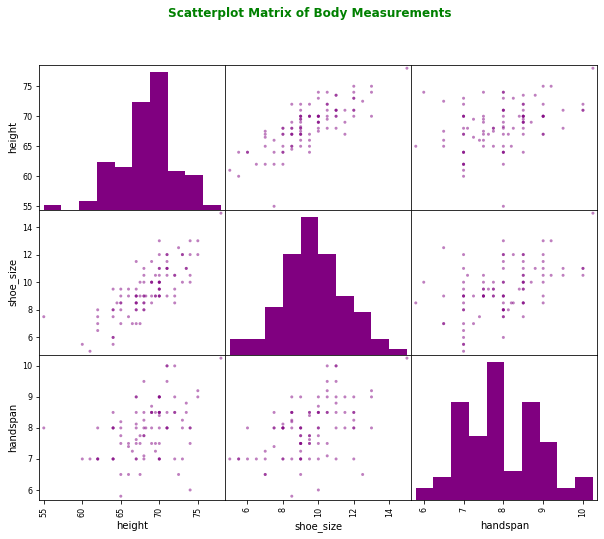

In [6]:
# Answer - create plot

# Create a scatterplot matrix of height, shoe_size, and handspan
scatter_matrix(body_data[['height', 'shoe_size', 'handspan']], alpha=0.5, figsize=(10,8)
               , diagonal='hist', color='purple', hist_kwds={'color': 'purple'})

# Set the title
plt.suptitle('Scatterplot Matrix of Body Measurements', fontweight='bold', color='green')

# Show the plot
plt.show()

<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ This code creates a scatterplot matrix of height, shoe_size, and handspan using the **```scatter_matrix()```** function from **pandas.plotting** 

+ The **alpha** parameter sets the transparency of the points, **figsize** sets the size of the plot, and **diagonal** sets the type of plot to use on the diagonal (in this case, a histogram)

+ The **strongest relationship is between height and shoe_size**. It appears to be a moderately strong positive correlation between these two, meaning that as height increases, shoe size tends to increase as well

+ The **weakest relationship is between handspan and height**. 
    
</span>

### Problem 7: (3 points)

<span  style="color:purple; font-size:16px">Create a correlation matrix of `height`, `shoe_size`, and `handspan`. Relate the values from the correlation matrix to the values in the scatterplot matrix above.</span>

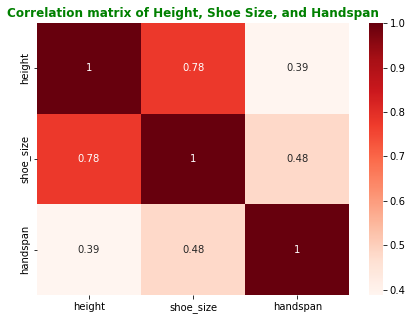

In [7]:
# Answer

# select the columns 
cols = ['height', 'shoe_size', 'handspan']

# create a correlation matrix
corr_matrix = body_data[cols].corr()

# create a heatmap of the correlations
plt.figure(figsize=(7, 5))  # set the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='Reds')

# Set the title
plt.title('Correlation matrix of Height, Shoe Size, and Handspan', fontweight='bold', color='green')

# Show the plot
plt.show()


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ In Problem 6, we can see that the scatterplot of **height** versus **handspan** has a positive correlation, but these two have the least corelation, which is reflected in the correlation matrix

+ The scatterplot of **height** versus **shoe size** also shows a positive correlation, which is again reflected in the correlation matrix, these two have the best corelation among all

+ The scatterplot of **shoe size** versus **handspan** has a positive correlation, which is also reflected in the correlation matrix, these two have the second best correlation
</span>


### Problem 8: (5 points)

<span  style="color:purple; font-size:16px">Great! So far, you have successfully used visualization to locate suspect values and handle them appropriately. But, there are other issues with data. Create a scatterplot matrix of the entire data and determine at least two variables that appear to have suspect values. Make sure to address why the values must be incorrect. (Hint: try using Seaborn's `pairplot()` for a better looking and easier to read plot!)</span>

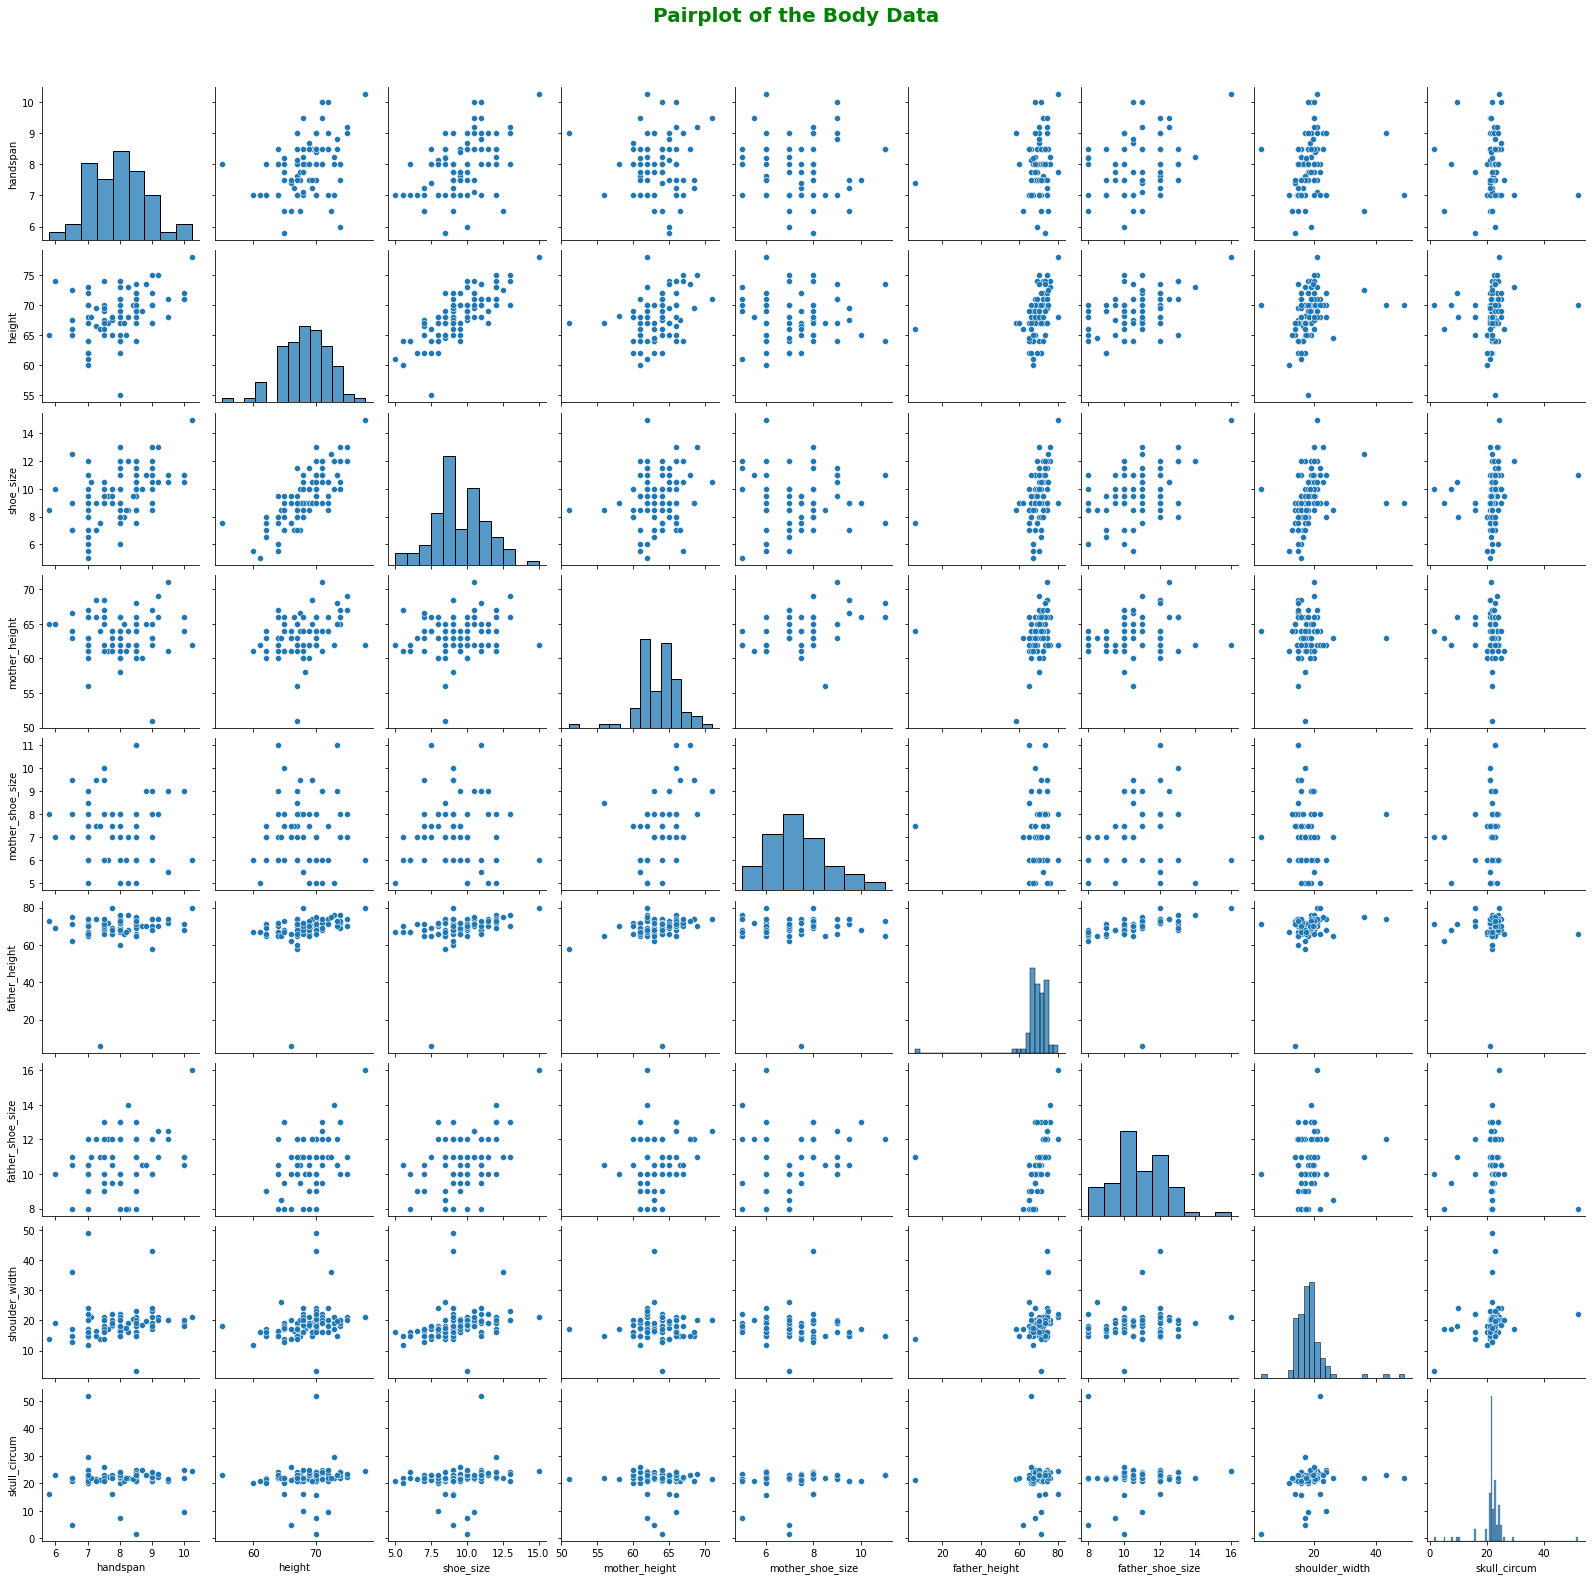

In [8]:
# Answer

sns.pairplot(body_data)
plt.subplots_adjust(top=0.93)
plt.suptitle('Pairplot of the Body Data', fontsize = 20, fontweight='bold', color='green')
plt.show()

<span  style="color:red; font-size:16px"> **Answer:**</span>

<span  style="color:green; font-size:14px">

Variables with issues: **```skull_circum```**, **```shoulder_width```**, **```shoe_size```**

Why you know the values must not be right:

+ <span  style="color:orange; font-size:14px"> **skull_circum:**</span> has a few extreme outliers that are much larger than the rest of the data points. These values must be incorrect because it is highly unlikely for someone's skull circumference to be that much larger than the rest of the population

+ <span  style="color:orange; font-size:14px"> **shoulder_width:**</span> also has a few outliers that are much larger than the rest of the data points. These values must be incorrect because it is highly unlikely for someone's shoulder width to be that much larger than the rest of the population

+ <span  style="color:orange; font-size:14px"> **shoe_size:**</span> which also has some outliers that are much larger than the rest of the data. These outliers could be due to incorrect data entry or measurement error
    
</span>

### Problem 9: (3 points)

<span  style="color:purple; font-size:16px">The survey, when asking information about the respondent's `sex`, allowed for people to respond: *Male*, *Female*, or *Prefer not to say*. How many observations were there for each level of `sex`?</span>

In [9]:
# Answer

sex_counts = body_data['sex'].value_counts()
print(sex_counts)

Male                 70
Female               27
Prefer not to say     1
Name: sex, dtype: int64


<span  style="color:red; font-size:16px"> **Answer:**</span>

<span  style="color:green; font-size:14px">

+ Used the **```.value_counts()```** method of a pandas DataFrame to answer the problem
+ There are a total of **70 Male observations**, **27 Female observations**, and **1 Prefer not to say observation**
    
 </span>

### Problem 10: (3 points)

<span  style="color:purple; font-size:16px">Because there are very few who `prefer not to say`, permanently remove them from the data using the `drop(index = XXXX)` method. Take appropriate steps to verify that these observations have been removed.</span>

In [10]:
# Answer

# Create a Boolean filter to select rows where the sex is "Prefer not to say"
not_sure_filter = body_data["sex"] == "Prefer not to say"

# Get the indices of the rows to drop
rows_to_drop = body_data.index[not_sure_filter]

# Drop the rows from the dataframe
body_data.drop(index=rows_to_drop, inplace = True)

# Check if the drop is successful
body_data["sex"].value_counts()

Male      70
Female    27
Name: sex, dtype: int64

<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ To remove the observations where Sex is  Prefer not to say, 
  + First I created a Boolean filter to select the rows where the sex column equals "**Prefer not to say**", 
  + Then used the **.index** to attribute to extracts the indices of the rows that satisfy this condition
  + And then used the **.drop()** method to remove those rows.
  
+ Used the **```.value_counts()```** method to verify whether the drop was sucessful or not
</span>

### Problem 11: (5 points)

<span  style="color:purple; font-size:16px">Create a DataFrame called `avg_heights` containing 3 columns, 1.) the average `height` (by `sex` and `shoe_size`), 2.)`sex`, and 3.) `shoe_size`. Print out the DataFrame. (Hint: use `groupby()` and deal with the index appropriately.)</span>

In [11]:
# Answer

avg_heights = body_data.groupby(['sex', 'shoe_size'])['height'].mean().reset_index()
avg_heights = avg_heights[['height', 'sex', 'shoe_size']]
avg_heights

,height,sex,shoe_size
0,62.000000,Female,5.5
1,64.000000,Female,6.0
2,62.000000,Female,6.5
3,65.250000,Female,7.0
4,61.750000,Female,7.5
5,64.666667,Female,8.0
6,67.125000,Female,8.5
7,67.600000,Female,9.0
8,64.000000,Female,9.5
9,67.500000,Female,10.0


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ To create a DataFrame called **```avg_heights```** containing the average height, sex, and shoe_size, we can use the **```.groupby()```** method on the body_data and aggregate by the mean height
+ Then used the **```.reset_index()```** to reset the index since we want to change the index from **sex** to **average height**
+ Then I changed the order of columns in **avg_heights** using the indexing operator **[ ]**
    
</span>

### Problem 12: (3 points)

<span  style="color:purple; font-size:16px">Create a plot using Seaborn's `pairplot()` on the `avg_heights` data, setting the `hue = sex`. Describe what you see.</span>

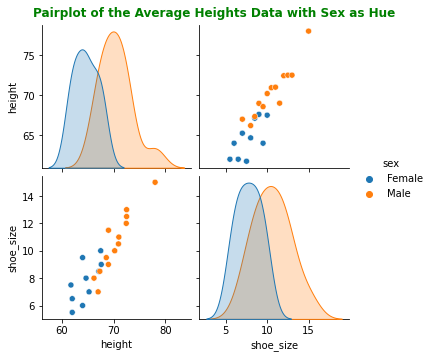

In [12]:
# Answer

sns.pairplot(avg_heights, hue ='sex')
plt.subplots_adjust(top=0.93) # adjust subplot parameters

# add title to the plot
plt.suptitle('Pairplot of the Average Heights Data with Sex as Hue', fontsize = 12, fontweight='bold', color='green')
plt.show()

<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ The pairplot shows scatter plots between all the pairs of variables in the **avg_heights** dataframe

+ Each plot is differentiated by the hue variable "**sex**"

+ From the plot, we can observe that there seems to be a positive relationship between **shoe size** and **average height** for both **males** and **females**
+ Females have a **narrower range** of shoe sizes and heights compared to males

+ Also, we can see that the **average heights** for **males** are **higher** than for **females**, across all shoe sizes
</span>

### Problem 13: (5 points)

<span  style="color:purple; font-size:16px">Use the plot to determine a reasonable rule for defining a cutoff for `height` and `shoe_size` that might be useful in determining if an individual is male or female. Can your rules perfectly predict `sex` based on `height` and `shoe_size`? (Example: If `height` is less than XXX and `shoe_size is less than XXX then I would predict the individual to be XXX. Answers may vary.)</span>

<span  style="color:red; font-size:16px"> **Written Answer:**</span>

<span  style="color:green; font-size:14px">

I'd like to define two rules, one to determine if an individual is male, and the other to determine if an individual is female

+ If height is **less than** approximately **67** inches **AND** **shoe_size** is **less than** approximately **10**, then I would predict the individual to be **FEMALE**


+ If height is **greater than** approximately **67** inches **AND** **shoe_size** is **greater than** approximately **10**, then I would predict the individual to be **MALE**
</span>


### Problem 14: (3 points)

<span  style="color:purple; font-size:16px">Use `pivot_table()` with the `body_data` to create a DataFrame with `shoe_size` as the index, `sex` as the columns, and the `height` as the values with `mean` as the aggregation function.</span>

In [13]:
# Answer

shoe_size_sex_height = pd.pivot_table(body_data, values='height', index='shoe_size', columns='sex', aggfunc='mean')
shoe_size_sex_height

sex,Female,Male
shoe_size,,
5.5,62.000000,NaN
6.0,64.000000,NaN
6.5,62.000000,NaN
7.0,65.250000,67.000000
7.5,61.750000,NaN
8.0,64.666667,66.200000
8.5,67.125000,67.333333
9.0,67.600000,68.977273
9.5,64.000000,68.571429


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ In this code, we are using **```pd.pivot_table()```** to create a new DataFrame **shoe_size_sex_height**
+ We are specifying that the **values** we want to include in the table are the **heights**, with the **index** being the **shoe sizes** and the **columns** being the **sex**
+ We are **aggregating** the data using the **mean** function
    
</span>

### Problem 15: (5 points)

<span  style="color:purple; font-size:16px">Create overlapping kernel density estimates of `height` by `athlete` and `height` by `sex`. Interpret what you see in the plot. Do athletes seem to be any taller/shorter than non-athletes? Make sure to include the argument `legend = True` in your plotting command.</span>

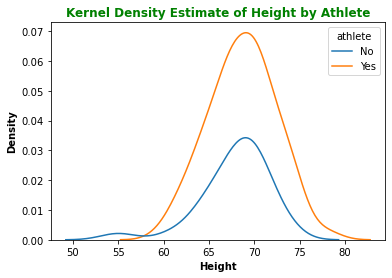

In [14]:
# Answer
# Compare heights for athletes and non-athletes

# Kernel density estimate of height by athlete
sns.kdeplot(data=body_data, x="height", hue="athlete", legend=True)

# Add title and axis labels
plt.title('Kernel Density Estimate of Height by Athlete', color='green', fontweight='bold')
plt.xlabel("Height", fontweight='bold')
plt.ylabel("Density", fontweight='bold')

# Show the plot
plt.show()

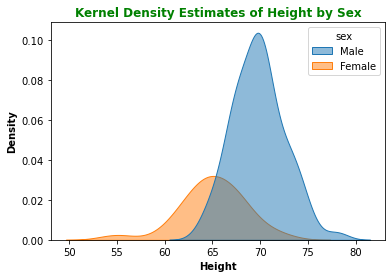

In [15]:
# Answer - part 2
# Compare heights by sex

# Kernel density estimate of height by sex
sns.kdeplot(data=body_data, x="height", hue="sex"
            , fill=True, alpha=0.5, legend=True)

# Add title and axis labels
plt.title("Kernel Density Estimates of Height by Sex", color='green', fontweight='bold')
plt.xlabel("Height", fontweight='bold')
plt.ylabel("Density", fontweight='bold')

# Show the plot
plt.show()

<span  style="color:red; font-size:16px"> **Written Answer:**</span>

<span  style="color:green; font-size:14px">

+ It appears that **athletes** tend to be **slightly taller** than **non-athletes**, as the kernel density estimate for **athletes** has **shifted slightly to the right**


+ The kernel density estimate of height by **sex** shows that on average, **males** tend to be **taller** than **females**
</span>

### Problem 16: (3 points)

<span  style="color:purple; font-size:16px">Create one overlapping density plot of `height` by `sex` and `athlete`. (Hint: use `groupby()` on both grouping variables.) Like before, make sure to include a legend. Describe the relationship between `sex`, `athlete`, and `height`. How does your interpretation relate to your answers to the previous few problems?</span>

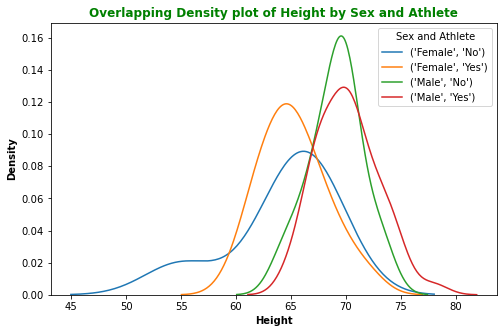

In [16]:
# Answer

# Group the data by sex and athlete
grouped_data = body_data.groupby(['sex', 'athlete'])

plt.figure(figsize=(8, 5))  # Set the size of the figure

# Plot the density curves
for name, group in grouped_data:
    sns.kdeplot(data=group, x='height', label=name)

# Add a legend and axis labels
plt.title("Overlapping Density plot of Height by Sex and Athlete", color='green', fontweight='bold')
plt.legend(title='Sex and Athlete')
plt.xlabel('Height', fontweight='bold')
plt.ylabel('Density', fontweight='bold')

# Show the plot
plt.show()

<span  style="color:red; font-size:16px"> **Written Answer:**</span>

<span  style="color:green; font-size:14px">

From the density plot: 

+ We can see that both **male** and **female** **athletes** tend to have higher heights than their **non-athlete** counterparts, but the difference is smaller in **female** when compared to **male**

+ Additionally, **male-athletes** generally have **higher heights** than **female-athletes**. 
   
+ This interpretation is consistent with our previous results from the pivot table and kernel density plots, where we observed that **male-athletes** have **higher mean heights** compared to **non-athletes** and **female-athletes**
    </span>

### Problem 17: (3 points)

<span  style="color:purple; font-size:16px">Determine if there are missing values in the data. If so, in what columns? How many missing values are there?</span>

In [17]:
# Answer

# check for missing values using isna() and sum()
# count the number of missing values in each column

print(f"\033[1;31mNumber of missing values in each column:\033[0m \n\n{body_data.isna().sum()}")

# count the total number of missing values in the DataFrame
print(f"\nThere are a total of\033[1;31m {body_data.isna().sum().sum()}\033[0m missing values in Body Data.")


Number of missing values in each column: 

timestamp             0
sex                   4
handspan              6
height                3
shoe_size             0
hair_color            0
mother_height        22
mother_shoe_size     38
mother_hair_color     0
father_height        18
father_shoe_size     31
father_hair_color     0
athlete               0
shoulder_width        0
skull_circum          0
dtype: int64

There are a total of 122 missing values in Body Data.


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ Used the **```.isna()```** method to check for missing values in **body_data**  

+ The  **```.sum()```** method is then called on to count the number of **missing values** in each column. The result is printed using an **f-string**

+ The second print statement calls the **```.sum()```** method twice to get the total number of missing values in the entire **body_data** DataFrame

</span>

### Problem 18: (3 points)

<span  style="color:purple; font-size:16px">Determine how many non-missing values are in each column of `body_data`.</span>

In [18]:
# Answer

print(f"\033[1;31mNumber of non-missing values in each column:\033[0m\n\n{body_data.count()}")

Number of non-missing values in each column:

timestamp            101
sex                   97
handspan              95
height                98
shoe_size            101
hair_color           101
mother_height         79
mother_shoe_size      63
mother_hair_color    101
father_height         83
father_shoe_size      70
father_hair_color    101
athlete              101
shoulder_width       101
skull_circum         101
dtype: int64


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ Used the **```.count()```** method of pandas to count the **non-missing** values in each column of **body_data**
</span>

### Problem 19: (3 points)

<span  style="color:purple; font-size:16px">Create a heatmap of the missing values using the Seaborn library.</span>

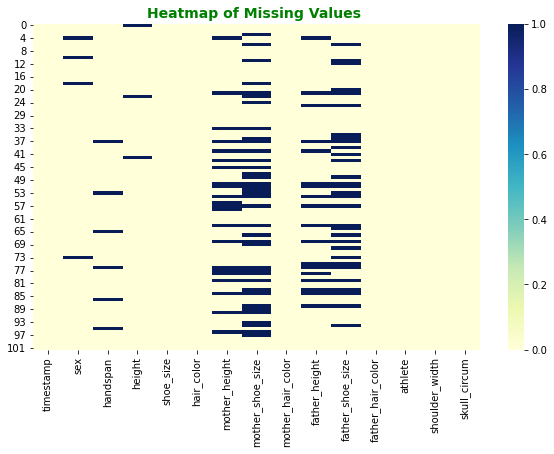

In [19]:
# Answer

plt.figure(figsize=(10, 6))  # Set the size of the figure

# create a heatmap of the missing values in body_data
sns.heatmap(body_data.isna(), cmap="YlGnBu")

# set the title of the plot
plt.title("Heatmap of Missing Values ", color='green', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ Used the **```sns.heatmap()```** function to create a heatmap of the missing values in **body_data**

+ The **```body_data.isna()```** function creates a Boolean mask indicating the missing values in each cell, which is then used as the input to the **sns.heatmap()** function

+ The **```plt.title()```** function is used to set the title of the plot 
</span>

### Problem 20: (5 points)

<span  style="color:purple; font-size:16px">There appears to be some missing values in the `sex` column. We want to impute values for these missing observations. Using the `height` for each of the individuals, determine the probability that the person was male or female. This question works in conjunction with problem 12, so refer to the visualization you created there for guidance.</span>

+ Extract the data corresponding to each of the missing values of `sex`. 
+ Calculate the proportion of Males and Females taller than or equal to each of heights of the missing observations

In [20]:
# Answer - extract data corresponding to missing values of sex

# extract data corresponding to missing values of sex
missing_data = body_data[body_data["sex"].isna()]
missing_data

,timestamp,sex,handspan,height,shoe_size,hair_color,mother_height,mother_shoe_size,mother_hair_color,father_height,father_shoe_size,father_hair_color,athlete,shoulder_width,skull_circum
4,9/20/2018 20:31,NaN,10.0,71.0,11.0,Black,NaN,9.0,Black,NaN,11.0,Black,No,19.0,22.0
10,9/20/2018 21:37,NaN,7.0,64.0,6.0,Brown,62.0,6.0,Black,67.0,10.0,Black,Yes,16.0,24.0
18,9/21/2018 9:16,NaN,8.0,74.0,13.0,Brown,66.0,NaN,Brown,76.0,13.0,Black,Yes,20.0,24.0
73,9/23/2018 13:14,NaN,7.0,61.0,5.0,Black,62.0,5.0,Black,67.0,NaN,Black,No,16.0,21.0


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ The missing data is extracted using the **```.isna()```** method, which returns a boolean array indicating whether each value in the 'sex' column is missing or not
+ Then the boolean array is used to select only those rows from **body_data** where the **sex** value is missing, and these rows are stored in the **```missing_data```** dataframe
    
    </span>

Determine proportion of Males and Females with heights above  <span  style="color:red; font-size:14px"> **67**</span>


In [21]:
# Calculate proportion of males and females taller than 67

for index, row in missing_data.iterrows():
    height = row['height']
    
    # Only calculate for missing observations with height greater than 67
    if height > 67:
        
        # Calculate male and female counts shorter than height
        male_count = len(body_data[(body_data['sex'] == 'Male') & (body_data['height'] >= height)])
        female_count = len(body_data[(body_data['sex'] == 'Female') & (body_data['height'] >= height)])
        
        # Calculate total count and probabilities for each gender
        total_count = male_count + female_count
        male_prob = male_count / total_count
        female_prob = female_count / total_count
        
        # Print results for each missing observation
        print(f"Height: \033[1;31m{height}\033[0m, Male Probability: \033[1;31m{male_prob:.2f}\033[0m, Female Probability: \033[1;31m{female_prob:.2f}\033[0m")
        
        

Height: 71.0, Male Probability: 0.96, Female Probability: 0.04
Height: 74.0, Male Probability: 1.00, Female Probability: 0.00


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ A **for** loop is used to iterate over each row in **```missing_data```** 

+ For each row, the **height** value is extracted and used to filter the **body_data** dataframe to only include individuals with heights greater than **67**

+ Then, the number of males(**male_count**) and females(**female_count**) is counted using the **len()** function and boolean indexing with the **sex** column 

+ The **total_count** of males and females is then used to calculate the proportion of males(**male_prob**) and females(**female_prob**)  

+ The resulting probabilities are printed for each missing observation
 
    </span>

Determine proportion of Males and Females with heights below <span  style="color:red; font-size:14px"> **67**</span>


In [22]:
# Calculate proportion of males and females shorter than each missing observation

for index, row in missing_data.iterrows():
    height = row['height']
    
    # Only calculate for missing observations with height less than 67
    if height < 67:
        
        # Calculate male and female counts shorter than height
        male_count = len(body_data[(body_data['sex'] == 'Male') & (body_data['height'] <= height)])
        female_count = len(body_data[(body_data['sex'] == 'Female') & (body_data['height'] <= height)])
        
        # Calculate total count and probabilities for each gender
        total_count = male_count + female_count
        male_prob = male_count / total_count
        female_prob = female_count / total_count
        
        # Print results for each missing observation
        print(f"Height: \033[1;31m{height}\033[0m, Male Probability: \033[1;31m{male_prob:.2f}\033[0m, Female Probability: \033[1;31m{female_prob:.2f}\033[0m")


Height: 64.0, Male Probability: 0.08, Female Probability: 0.92
Height: 61.0, Male Probability: 0.00, Female Probability: 1.00


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ Used the same code as above, just changed the greater than symbol ( **>** ) to lesser than symbol ( **<** ) to find the male probability and female probability where height is less than 67
   </span>

### Problem 21: (3 points)

<span  style="color:purple; font-size:16px">Based on what you learned from the last exercise, impute the missing values of `sex`.</span>

In [23]:
# Answer - Create filter and impute for male bodies

# Create filter for missing sex and height > 67
male_filter = (body_data['sex'].isnull()) & (body_data['height'] > 67)

# Impute missing sex as "Male" for rows that meet filter criteria
body_data.loc[male_filter, 'sex'] = 'Male'

In [24]:
# Answer - Create filter and impute for female bodies

# Create filter for missing sex and height < 67
female_filter = (body_data['sex'].isnull()) & (body_data['height'] < 67)

# Impute missing sex as "Female" for rows that meet filter criteria
body_data.loc[female_filter, 'sex'] = 'Female'


In [25]:
# Answer - Verify success by checking for missing values of sex

print(f"There are \033[1;31m{body_data['sex'].isnull().sum()}\033[0m missing sex values in body_data.")

There are 0 missing sex values in body_data.


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ The first line creates a filter using boolean logic

+ The '&' operator combines two conditions: 
  + **```body_data['sex'].isnull()```**  checks if the 'sex' column is missing, 
  + and **```body_data['height'] > or < 67```**  checks if the 'height' column is greater than 67 or less than 67

+ The second line uses the **loc** accessor to select the rows that meet the filter criteria, and the 'sex' column in those rows is updated with the value **Male** or **Female** according to the filter
                                               
+ Then used the **```.isnull()```** method to create a boolean mask of the 'sex' column, where 'True' indicates a missing value 
+ The **```sum()```** method is then called on the boolean mask to count the number of missing values.
</span>

### Problem 22: (3 points)

<span  style="color:purple; font-size:16px">There appears to be some missing values in the `height` column. We want to impute values for these missing observations. Use the median `height` for each `sex` for imputation values.</span>

+ find the median height by `sex`. 
+ impute the missing values of `height` with the appropriate median

In [26]:
# Answer - calculate median height by sex

median_height_by_sex = body_data.groupby('sex')['height'].median()
median_height_by_sex

sex
Female    64.75
Male      70.00
Name: height, dtype: float64

In [27]:
# Checking for missing values of height before imputing
print(f"There are \033[1;31m{body_data['height'].isnull().sum()}\033[0m missing values in the height column.")

There are 3 missing values in the height column.


In [28]:
# Answer - impute missing values

for sex in median_height_by_sex.index:
    body_data.loc[(body_data['sex'] == sex) & (body_data['height'].isnull()), 'height'] = median_height_by_sex[sex]
    
    

In [29]:
# Answer - Verify success by checking for missing values of height

print(f"There are \033[1;31m{body_data['height'].isnull().sum()}\033[0m missing values in the height column.")

There are 0 missing values in the height column.


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ The first cell groups the **body_data** DataFrame by the **sex** column using the **```.groupby()```** method, and then selects the **height** column using indexing

+ The **```.median()```** method is used to calculate the median height for each sex. The result is stored in the **median_height_by_sex variable**

+ The second cell is used to check the total number of missing values before imputing

+ The third cell is a **for** loop to iterate over the index values of the **median_height_by_sex**

  + For each sex value, the code uses the **loc** accessor to select rows where the **sex** column matches the current sex value and the **height** column is missing

  + The **height** values in these rows are then updated with the corresponding **median** height value from the **median_height_by_sex**
  
+ Used the same code as in the secong cell to verify if the imputing is a sucess or not
</span>

### Problem 23: (3 points)

<span  style="color:purple; font-size:16px">Convert the `timestamp` variable to a `datetime` object. Sort the data by index. Print out any relevant output that can verify that the timestamp was converted to datetime type. </span>

In [30]:
# Answer

# Data type of timestamp before conversion
print(f" Timestamp variable is an \033[1;31m{body_data['timestamp'].dtype}\033[0m before conversion.\n")

# Convert timestamp to datetime object
body_data['timestamp'] = pd.to_datetime(body_data['timestamp'])

# Sort data by index
body_data.sort_index(inplace=True)

# Print output to verify datetime conversion
print(f" Timestamp variable is converted to \033[1;31m{body_data['timestamp'].dtype}\033[0m sucessfully.")

 Timestamp variable is an object before conversion.

 Timestamp variable is converted to datetime64[ns] sucessfully.


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ In the first line I used, **```.dtype```** attribute to find out the type of **body_data['timestamp']** before conversion

+ The second line uses the **```.to_datetime()```** method to convert the **timestamp** column of **body_data**  to a datetime object

+ The third line uses the **```.sort_index()```** method to sort **body_data** by its index

+ The third line uses the **```.info()```** method to print out the metadata information of the 'body_data' DataFrame, which includes the data types of each column. 

+ Repeated the first line here again to verify that the **timestamp** column has been converted to **datetime** type
  </span>

### Problem 24: (3 points)

<span  style="color:purple; font-size:16px">Plot a time-series plot of the responses by `timestamp` by calling the `plot()` method on the `timestamp` column extracted as a Series. Provide a suitable title and make the plot large. Interpret what you are seeing in the plot. How do you explain the stair-step shape? (Hint: The index will be displayed on the x-axis and the timestamp on the y-axis)</span>

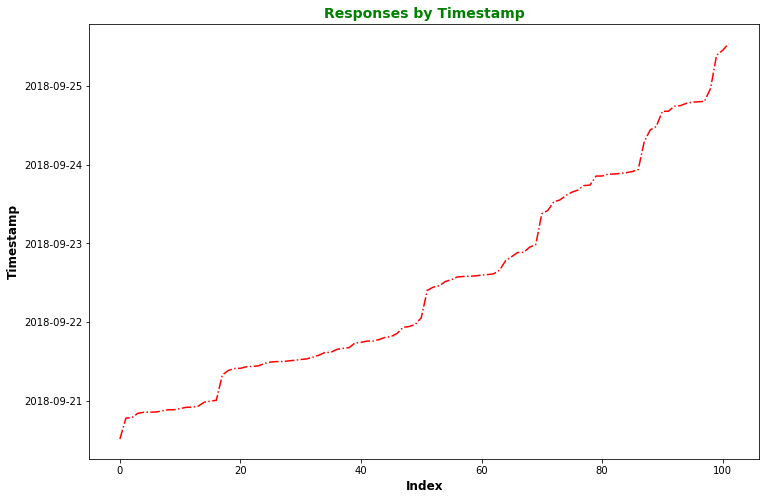

In [31]:
# Answer

# Plot responses by timestamp
body_data['timestamp'].plot(figsize=(12,8), color='red', linestyle='-.')
plt.title('Responses by Timestamp', color='green', fontsize=14, fontweight='bold')
plt.xlabel('Index', fontweight='bold', fontsize=12)
plt.ylabel('Timestamp', fontweight='bold', fontsize=12)
plt.show()

<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ The plot shows the number of responses over time, with the timestamp on the y-axis and the index (which corresponds to the order of the responses) on the x-axis

+ It has a **stair-step** shape because the responses were collected in batches at different times, resulting in periods of no responses followed by sudden increases in responses

+ The plot also shows that the overall trend is an increase in the number of responses over time, which indicates that more people participated in the study as time went on
    
    </span>

### Problem 25: (3 points)

<span  style="color:purple; font-size:16px">Determine the days of the week of the responses as recorded by the `timestamp` and save these values as a new column in the data called `DOW`.</span>

In [32]:
# Answer

body_data['DOW'] = body_data['timestamp'].dt.day_name()
body_data.head()

,timestamp,sex,handspan,height,shoe_size,hair_color,mother_height,mother_shoe_size,mother_hair_color,father_height,father_shoe_size,father_hair_color,athlete,shoulder_width,skull_circum,DOW
0,2018-09-20 12:21:00,Male,7.75,70.00,9.5,Black,63.0,7.0,Brown,69.0,10.5,Black,No,18.00,22.25,Thursday
1,2018-09-20 18:43:00,Male,8.50,67.00,8.5,Blonde,62.0,6.0,Brown,74.0,11.0,Blonde,Yes,16.00,24.00,Thursday
2,2018-09-20 18:53:00,Female,7.00,62.00,7.0,Black,61.0,6.0,Black,65.0,9.0,Black,Yes,15.00,22.00,Thursday
3,2018-09-20 20:13:00,Male,8.00,68.25,9.0,Brown,58.0,NaN,Blonde,70.0,10.0,Black,No,17.25,21.75,Thursday
4,2018-09-20 20:31:00,Male,10.00,71.00,11.0,Black,NaN,9.0,Black,NaN,11.0,Black,No,19.00,22.00,Thursday


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ Used the **```.dt.day_name()```** method on the **timestamp** column of **body_data** to extract the day of the week for each observation
+ Finally, I assigned this information to a new column called **DOW** in **body_data**
</span>

### Problem 26: (3 points)

<span  style="color:purple; font-size:16px">Create a visualization showing the number of survey submissions by the day of the week. What day had the most submissions? The least number of submissions?</span>

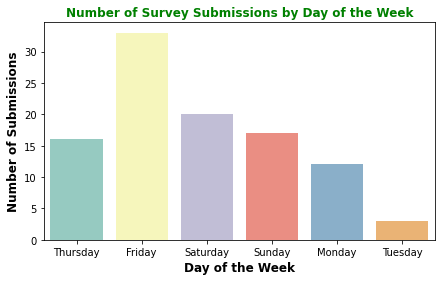

In [33]:
# Answer

plt.figure(figsize=(7, 4))  # Set the size of the figure

sns.countplot(x='DOW',data=body_data, palette="Set3")
plt.title('Number of Survey Submissions by Day of the Week', color='green', fontsize=12, fontweight='bold')
plt.xlabel('Day of the Week', fontweight='bold', fontsize=12)
plt.ylabel('Number of Submissions', fontweight='bold', fontsize=12)
plt.show()


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ Used seaborn's **```countplot()```** function to plot the day of the week of survey submissions. 

+ **Friday** has the most number of sumissions
+ **Tuesday** has the least number of submissions
   
 </span>

### Problem 27: (3 points)

<span  style="color:purple; font-size:16px">On what day of the week was the first response submitted? The last response?</span>

In [34]:
# Answer

# Sorting body data in ascending timestamp values
body_data = body_data.sort_values('timestamp') 

# First response
print(f"\033[1;31m{body_data['DOW'].iloc[0]}\033[0m is the day that first response was submitted.")

Thursday is the day that first response was submitted.


In [35]:
# Answer
# Last response

print(f"The last response was submitted on a \033[1;31m{body_data['DOW'].iloc[-1]}\033[0m.")

The last response was submitted on a Tuesday.


### Problem 28: (3 points)

<span  style="color:purple; font-size:16px">Set the `timestamp` column to be the index. Use the `resample()` method to aggregate the data in 3 hour intervals. Use the `agg()` function to apply the `count` method to the `sex` column. Finally, plot the time-series so we can visualize the number of responses submitted over each 3 hour interval. Describe any pattern that you see in the data.</span>

(Hint: After setting timestamp to be the index, use code like: `data.resample(<stuff>).agg(<stuff>).plot(<stuff>)`)

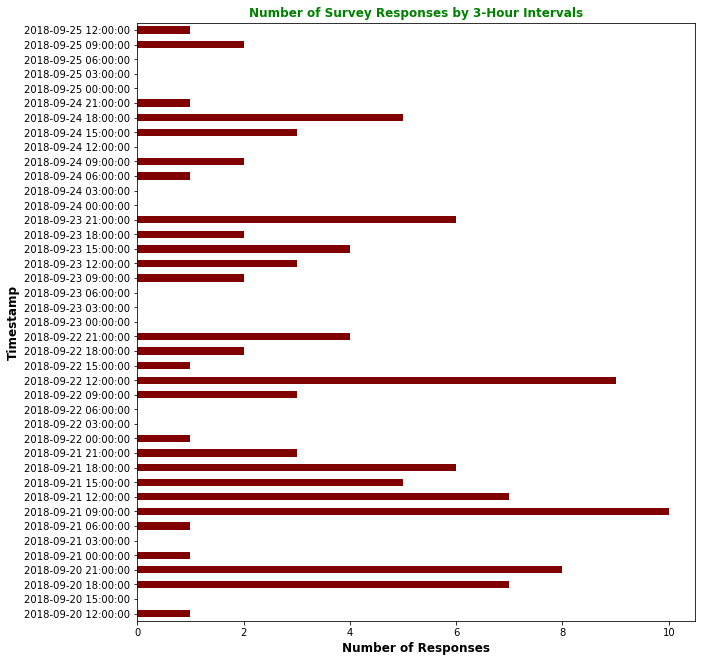

In [36]:
# Answer

body_data = body_data.set_index('timestamp')
body_data.resample('3H').agg({'sex': 'count'}).plot(figsize=(10, 11), color='maroon', kind='barh',legend=False)
plt.title('Number of Survey Responses by 3-Hour Intervals', color='green', fontsize=12, fontweight='bold')
plt.xlabel('Number of Responses', fontsize=12, fontweight='bold')
plt.ylabel('Timestamp', fontsize=12, fontweight='bold')
plt.show()

<span  style="color:red; font-size:16px"> **Written Answer:**</span>

<span  style="color:green; font-size:14px">

+ On **September 21st between 09:00:00 and 12:00:00**, there were **10** responses, which is the highest number of responses in any 3-hour interval in body_data
+ There is a clear difference in response counts between different parts of the day,

  + For example, there are very few responses during the night hours(**between 00:00:00 and 6:00:00**), and a peak in the morning and evening hours
  + There are **zero** responses **between 03:00:00 and 6:00:00** on any day in the body_data
  + The 3-hour intervals **between 18:00:00 and 21:00:00**, and **between 21:00:00 and 00:00:00** have the highest number of reponses with **22** each

    </span>

### Problem 29: (3 points)

<span  style="color:purple; font-size:16px">Use the time index to extract all survey submissions on Sept 25. How many submissions were made on that day?</span>

In [37]:
# Answer

sept25 = body_data.loc['2018-09-25']
total_sept25 = len(sept25)
print(f"Number of survey submissions on 25th September 2018 are : \033[1;31m{total_sept25}\033[0m")

Number of survey submissions on 25th September 2018 are : 3


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ First used the **```.loc[]```** method to extract all rows from **body_data** that have a timestamp of September 25 
+ The resulting DataFrame, **sept25**, will contain all survey submissions made on September 25

+ Then, used the **len()** function to determine the number of submissions in **sept25**. The resulting value is stored in **total_sept25** 
    
 </span>


### Problem 30: (3 points)

<span  style="color:purple; font-size:16px">Use the time index to extract all survey submissions between 10AM and 2PM on September 21. How many submissions were made during that time?</span>

In [38]:
# Answer

sept21 = body_data.loc['2018-09-21 10:00:00':'2018-09-21 14:00:00']
total_sept21 = len(sept21)
print(f"Number of survey submissions between 10AM and 2PM on 21st September 2018: \033[1;31m{total_sept21}\033[0m")


Number of survey submissions between 10AM and 2PM on 21st September 2018: 12


<span  style="color:red; font-size:16px"> **Explanation:**</span>

<span  style="color:green; font-size:14px">

+ Used the same logic as the previous problem to solve this
+ First used the **```.loc[]```** method to extract all rows from **body_data** that have a timestamp of September 21 between 10AM and 2PM and saved in to a DataFrame called sept21

+ Then, used the **len()** function to determine the number of submissions in sept25. The resulting value is stored in **total_sept21**
    
</span>